# Sequence Models

Using data from yahoo finance, create a RNN, LSTM, and GRU to give predicitons of closing prices for Nividia stock.

Compare each model with each other to see which does better in making predictions. 

Build a multi-variable LSTM with the same Nividia stock data from yahoo finance and see how well it performs.

In [27]:
import yfinance as yf

nvidia_data = yf.Ticker("NVDA")

In [117]:
nvidia_price_df = nvidia_data.history(period='max')[['Close']]

In [118]:
nvidia_price_df

,Close
Date,
1999-01-22 00:00:00-05:00,0.037607
1999-01-25 00:00:00-05:00,0.041547
1999-01-26 00:00:00-05:00,0.038323
1999-01-27 00:00:00-05:00,0.038204
1999-01-28 00:00:00-05:00,0.038084
...,...
2025-11-24 00:00:00-05:00,182.550003
2025-11-25 00:00:00-05:00,177.820007
2025-11-26 00:00:00-05:00,180.259995


In [29]:
import pandas as pd
nvidia_price_df.to_csv('data/nvidia_stock_price_max_hist.csv')

In [30]:
nvidia_price_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6756.000000,6756.000000,6756.000000,6756.000000,6.756000e+03,6756.000000,6756.000000
mean,13.019909,13.242163,12.770458,13.017909,5.879535e+08,0.000032,0.003182
std,34.392324,34.929997,33.750145,34.366044,4.294349e+08,0.000410,0.138823
min,0.031996,0.032593,0.030563,0.031280,1.968000e+07,0.000000,0.000000
25%,0.261732,0.269717,0.254636,0.261981,3.237240e+08,0.000000,0.000000
50%,0.446638,0.453782,0.439895,0.446982,4.903940e+08,0.000000,0.000000
75%,5.444375,5.562803,5.360968,5.434551,7.204350e+08,0.000000,0.000000
max,208.080002,212.190002,205.559998,207.039993,9.230856e+09,0.010000,10.000000


In [36]:
nvidia_close = nvidia_price_df[['Close']]

array([[<Axes: title={'center': 'Close'}>]], dtype=object)

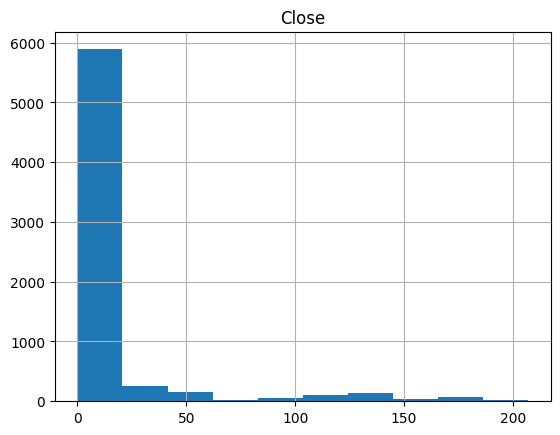

In [42]:
import matplotlib.pyplot as plt
nvidia_close.hist()

<Axes: xlabel='Date'>

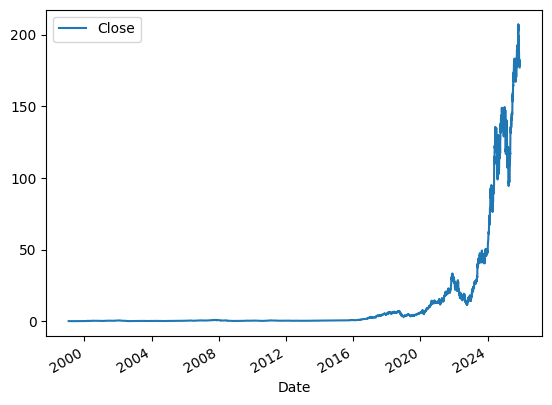

In [43]:
nvidia_close.plot()

In [60]:
nvidia_close_norm = (nvidia_close - nvidia_close.min()) / (nvidia_close.max() - nvidia_close.min())

<Axes: xlabel='Date'>

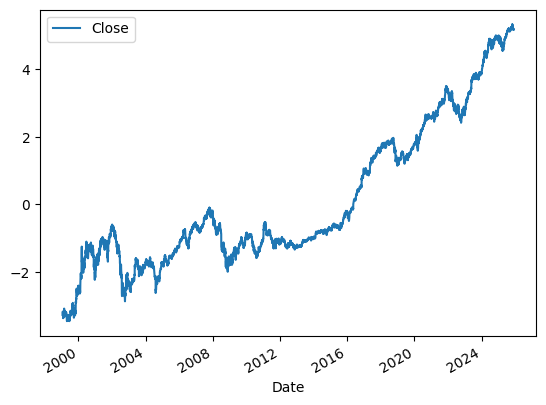

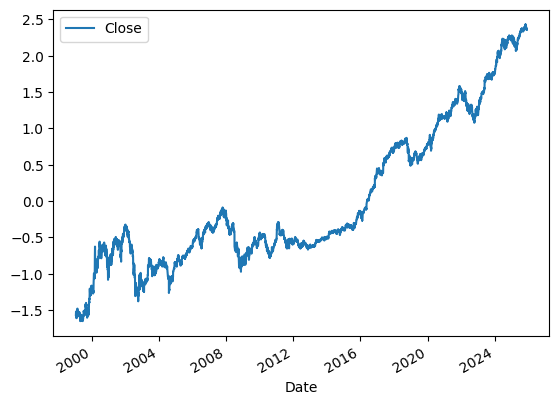

In [185]:
import numpy as np
nv_log = np.log(nvidia_close)
nv_log.plot()
nv = (nv_log - nv_log.mean()) / nv_log.std()
nv.plot()

In [176]:
np.log(0.2)

np.float64(-1.6094379124341003)

<Axes: xlabel='Date'>

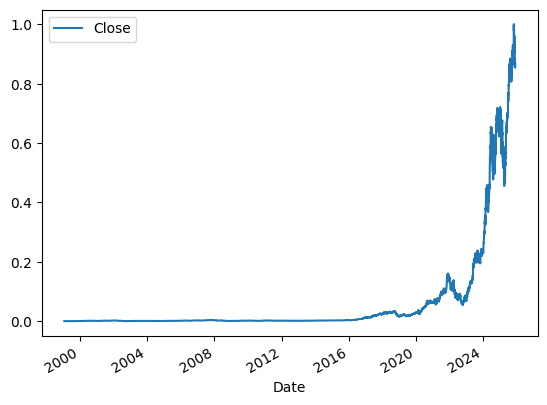

In [61]:
nvidia_close_norm.plot()

In [66]:
df = pd.DataFrame([0,1,2,3,4,5,6])

In [119]:
import numpy as np

nvidia_close_np = nvidia_close_norm.to_numpy()

nvidia_close_np.shape[0]

6756

In [ ]:
nvidia_timestep = np.column_stack([
    nvidia_close_np[0:-2],
    nvidia_close_np[1:-1],
    nvidia_close_np[2:]
])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 6754 and the array at index 1 has size 6753

In [171]:
[
    nvidia_close_np[0:-2],
    nvidia_close_np[1:-1],
    nvidia_close_np[2:]
]

[array([[3.05660340e-05],
        [4.95983708e-05],
        [3.40253513e-05],
        ...,
        [8.63967135e-01],
        [8.81695848e-01],
        [8.58846589e-01]], shape=(6754, 1)),
 array([[4.95983708e-05],
        [3.40253513e-05],
        [3.34494852e-05],
        ...,
        [8.81695848e-01],
        [8.58846589e-01],
        [8.70633471e-01]], shape=(6754, 1)),
 array([[3.40253513e-05],
        [3.34494852e-05],
        [3.28692642e-05],
        ...,
        [8.58846589e-01],
        [8.70633471e-01],
        [8.54885368e-01]], shape=(6754, 1))]

In [148]:
a[-1]

array([3, 4])

In [247]:
array = nvidia_close_np

array_len = array.shape[0]

window_length = 50
n = window_length - 1

train = []
val = []
arr_list = []
for i in range(0,window_length):
    idx1 = i
    idx2 = i - n
    if i == n:
        idx2 = array_len
    seq = array[idx1:idx2]
    arr_list.append(seq)
    train.append(seq[:int(.8*len(seq))])
    val.append(seq[int(.8*len(seq)):])

train_set = np.column_stack(train)
val_set = np.column_stack(val)
arr = np.column_stack(arr_list)


In [254]:
arr[0].shape

(50,)

In [252]:
train_set[0].shape

(50,)

In [253]:
val_set[0].shape

(50,)

In [222]:
array_len = len(nvidia_close_np)
ratio = int(0.2*array_len)
step = int(array_len / ratio)
test_data = nvidia_close_np[0::step]

print(test_data.shape)

(1352, 1)


In [236]:
5404 / 50

108.08

In [205]:
window[:,0:2]

array([[3.05660340e-05, 4.95983708e-05],
       [4.95983708e-05, 3.40253513e-05],
       [3.40253513e-05, 3.34494852e-05],
       ...,
       [9.00873791e-01, 8.72469166e-01],
       [8.72469166e-01, 8.63967135e-01],
       [8.63967135e-01, 8.81695848e-01]], shape=(6752, 2))

In [110]:
nvidia_close_np = nvidia_close.to_numpy()